##### Copyright 2019 The TensorFlow Authors. [Licensed under the Apache License, Version 2.0](#scrollTo=y_UVSRtBBsJk).

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License"); { display-mode: "form" }
// Licensed under the Apache License, Version 2.0 (the "License");
// you may not use this file except in compliance with the License.
// You may obtain a copy of the License at
//
// https://www.apache.org/licenses/LICENSE-2.0
//
// Unless required by applicable law or agreed to in writing, software
// distributed under the License is distributed on an "AS IS" BASIS,
// WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
// See the License for the specific language governing permissions and
// limitations under the License.

# Image Classification using Swift for TensorFlow

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/13lBsht3Wa4GjKKkA47JCrd54XikhNX2E"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="Link to be updated"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />GitHub link to be updated accordingly</a>
  </td>
</table>

In this Colab you will classify images of flowers. We'll build an image classifier using `Layer` and load data by creating Training and Validation Tensors of Images as well as their corresponding Labels

# Importing packages

Let's start by importing required packages:

*   glob — to read files and directory structure
*   numpy — for some matrix math outside of TensorFlow
*   matplotlib.pyplot — to plot the graph and display images in our training and validation data
*  PIL — to view images

In [0]:
import TensorFlow
import Foundation
import Python

%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")
let subprocess = Python.import("subprocess")
let plt = Python.import("matplotlib.pyplot")
let os = Python.import("os")
let np = Python.import("numpy")  // Make numpy available using np.
let glob = Python.import("glob")
let pil = Python.import("PIL")
let random = Python.import("random")

In order to build our image classifier, we can begin by downloading the flowers dataset.  

In [0]:
public extension String {
    @discardableResult
    func shell(_ args: String...) -> String {
        let (task, pipe) = (Process(), Pipe())
        task.executableURL = URL(fileURLWithPath: self)
        (task.arguments, task.standardOutput) = (args, pipe)
        do    { try task.run() }
        catch { print("Unexpected error: \(error).") }

        let data = pipe.fileHandleForReading.readDataToEndOfFile()
        return String(data: data, encoding: String.Encoding.utf8) ?? ""
    }
}

In [4]:
print("/bin/ls".shell("-lh"))

total 4.0K
drwxr-xr-x 1 root root 4.0K Jul  3 16:14 sample_data



In [5]:
// Dataset download.

let command = "wget -nv -O- https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz | tar xzf - -C ."
subprocess.call(command, shell: true)

2019-07-09 00:03:44 URL:https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz [228813984/228813984] -> "-" [1]


0


The  dataset we downloaded contains images of 5 types of flowers:

1. Rose
2. Daisy
3. Dandelion
4. Sunflowers
5. Tulips

So, let's create the labels for these 5 classes: 

In [0]:
let classNames = ["roses", "daisy", "dandelion", "sunflowers", "tulips"]

Also, The dataset we have downloaded has following directory structure. 

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>diasy</b>
|__ <b>dandelion</b>
|__ <b>roses</b>
|__ <b>sunflowers</b>
|__ <b>tulips</b>
</pre>

In [7]:
let filelist = try FileManager.default.contentsOfDirectory(atPath: "./flower_photos/daisy")
for filename in filelist {
    print(filename)
}

8616684075_71923bb771_n.jpg
3415180846_d7b5cced14_m.jpg
2498632196_e47a472d5a.jpg
14600779226_7bbc288d40_m.jpg
14674743211_f68b13f6d9.jpg
5809489674_5659b3ae5d_n.jpg
9350942387_5b1d043c26_n.jpg
4432271543_01c56ca3a9.jpg
18400014056_2e4c601ed5.jpg
754296579_30a9ae018c_n.jpg
14264136211_9531fbc144.jpg
2607132536_d95198e619_n.jpg
6950173662_5e9473003e_n.jpg
11023272144_fce94401f2_m.jpg
2454280135_ac3aa75cdc_n.jpg
2556503265_63ae6b9e0e_m.jpg
1344985627_c3115e2d71_n.jpg
7320089276_87b544e341.jpg
14221836990_90374e6b34.jpg
5434901893_4550be3f84_m.jpg
1392946544_115acbb2d9.jpg
9146733107_98b15d3892_m.jpg
3410906335_37e8a24b1c_n.jpg
14421389519_d5fd353eb4.jpg
169371301_d9b91a2a42.jpg
2538504987_fe524b92a8_n.jpg
538920244_59899a78f8_n.jpg
6529588249_d9cbe68aab_n.jpg
11642632_1e7627a2cc.jpg
3080880039_4f1bd592e5_n.jpg
8120563761_ed5620664f_m.jpg
8696022686_1f8d62c5cb_m.jpg
12193032636_b50ae7db35_n.jpg
6884975451_c74f445d69_m.jpg
5608389827_a42a46f760.jpg
8348621545_8f02b82662_n.jpg
2649404904_b7

In [8]:
// List of paths created.

let totalImages = glob.glob("flower_photos/*/**.jpg")
let daisyList = glob.glob("flower_photos/daisy/*.jpg")
let dandelionList = glob.glob("flower_photos/dandelion/*.jpg")
let rosesList = glob.glob("flower_photos/roses/*.jpg")
let sunflowersList = glob.glob("flower_photos/sunflowers/*.jpg")
let tulipsList = glob.glob("flower_photos/tulips/*.jpg")

print("Total Images \(totalImages.count)")
print("roses \(rosesList.count)")
print("sunflowers \(sunflowersList.count)")
print("daisy \(daisyList.count)")
print("tulips \(tulipsList.count)")
print("dandelion \(dandelionList.count)")

Total Images 3670
roses 641
sunflowers 699
daisy 633
tulips 799
dandelion 898


We'll now assign variables with the proper file path for the training and validation sets.

As you can see there are no folders containing training and validation data. Therefore, we will have to create our own training and validation set. Let's write some code that will do this. 


The code below creates a `trainList` and a `testList` list. It then copies the image paths from the original folders to these new lists such that 80% of the images go to the training set and 20% of the images go into the validation set.

In [9]:
let numTotalImages = [641, 699, 633, 799, 898]
let numTrainImages = [512, 559, 506, 639, 718]  // Number of Train Images = 0.8 * Number of Total Images.
var trainList = Python.list()
var testList = Python.list()
var i = 0, numImagesDone = 0

for path in totalImages {
    if(numImagesDone == numTotalImages[i]) {
        i += 1
        numImagesDone = 0
    }
    if(numImagesDone >= numTrainImages[i]) {
        testList.append(path)
        numImagesDone += 1
    } else {
        trainList.append(path)
        numImagesDone += 1
    }
}

for i in 0 ..< 5 {
    np.random.shuffle(trainList)
    np.random.shuffle(testList)
}

print("Total Images \(totalImages.count)")
print("Train Images \(trainList.count)")
print("Test Images \(testList.count)")

Total Images 3670
Train Images 2934
Test Images 736


# Data Preparation 

Images must be formatted into appropriately pre-processed floating point tensors before being fed into the network. The steps involved in preparing these images are:

1. Read images from the disk
2. Decode contents of these images and convert it into proper grid format as per their RGB content
3. Convert them into floating point tensors
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

We have done this in the following code.

The `tensor` function takes image path as input and outputs a tuple of resized image tensor and it’s corresponding label.

The `tensors` function takes in a list of paths and the number of tensors to be produced in the output tensor as input. While processing, it gives number of images done as print statements so that we can have an understanding of how much process is done.

In [0]:
// Function `tensor(path:)` returns the resized image tensor and it's corresponding label.

func tensor(path: String) -> (Tensor<Float>, Int32) {
    let img = pil.Image.open(path)
    let image = np.array(img) * (1.0 / 255)
    let height = Int(image.shape[0])!
    let width = Int(image.shape[1])!
    let finalImage = np.zeros([height, width, 3], dtype: np.float32)
    for i in 0 ..< height {
        for j in 0 ..< width {
            finalImage[i, j] = image[i][j]
        }
    }
    var tensor = Tensor<Float>(numpy: finalImage)!
    tensor = tensor.expandingShape(at: 0)
    tensor = Raw.resizeArea(images: tensor , size: [150, 150])
    
    var label: Int32 = 0
    
    for i in 0 ..< 5 {
        if path.contains(classNames[i]) {
            label = Int32(i)
            break
        }
    }
    return (tensor, label)
}

// Function `tensors(fromList:valueCount:)` returns the entire list converted to tensors of images and labels from `tensor(path:)` function.
func tensors(fromList: PythonObject, valueCount: Int) -> (Tensor<Float>, Tensor<Int32>) {
    let batchFiles = fromList[0..<valueCount]
    var labels = [Int32]()
    var x: Tensor<Float>
    var y: Tensor<Int32>

    //load first image
    let path: String = String(batchFiles[0]) ?? ""
    let data = tensor(path: path)
    x = data.0 
    labels.append(data.1)

    //load the rest images 
    var numberOfFilesDone = 1
    for file in batchFiles[1 ..< valueCount] {
        let path = String(file) ?? ""
        let data = tensor(path: path)
        let tensor = data.0
        labels.append(data.1)
        x = Tensor(concatenating: [x, tensor], alongAxis: 0)
        numberOfFilesDone += 1
        if numberOfFilesDone.isMultiple(of: 10) {
            print("", (numberOfFilesDone), separator: " ", terminator:"")
        }
        if numberOfFilesDone.isMultiple(of: 100) {
            print("")
        }
    }
    print("")
    y = Tensor<Int32>(labels)
    return (x, y)
}

### Visualizing Training images

*We* can visualize our training images by creating functions to plot images through their paths or tensors, and then plotting a few of them.

In [0]:
func plotImages(_ image: Tensor<Float>) {
    let numpyImage = image.makeNumpyArray().reshape(150, 150, 3)
    plt.imshow(numpyImage)
    plt.show()
}

func plotImages(fromPath path: String) {
    let img = pil.Image.open(path)
    let image = np.array(img) * (1.0 / 255)
    plt.imshow(image)
    plt.show()
}

flower_photos/dandelion/2133943140_9fc7bcc9aa.jpg
[1, 150, 150, 3]


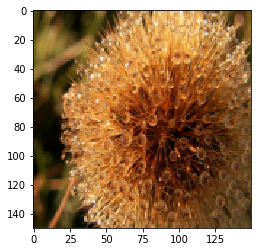

2
dandelion


In [12]:
let path: String = String(trainList[random.randint(0,trainList.count)]) ?? ""
print(path)
let check = tensor(path: path)
let checkTensor = check.0
print(checkTensor.shape)
plotImages(checkTensor)
print(check.1)
print(classNames[Int(check.1)])

After defining our generators for images and labels, we will load those images and labels in tensor arrays, thereby creating our `trainTensors` and `testTensors`.

In [13]:
// Tensor Dataset creation.
// This section will take around 20 minutes to complete.

let trainTensors = tensors(fromList: trainList, valueCount: trainList.count)
let trainImageTensors = trainTensors.0
let trainLabelTensors = trainTensors.1
print(trainImageTensors.shape)
print(trainLabelTensors.shape)
let testTensors = tensors(fromList: testList, valueCount: testList.count)
let testImageTensors = testTensors.0
let testLabelTensors = testTensors.1
print(testImageTensors.shape)
print(testLabelTensors.shape)

 10 20 30 40 50 60 70 80 90 100
 110 120 130 140 150 160 170 180 190 200
 210 220 230 240 250 260 270 280 290 300
 310 320 330 340 350 360 370 380 390 400
 410 420 430 440 450 460 470 480 490 500
 510 520 530 540 550 560 570 580 590 600
 610 620 630 640 650 660 670 680 690 700
 710 720 730 740 750 760 770 780 790 800
 810 820 830 840 850 860 870 880 890 900
 910 920 930 940 950 960 970 980 990 1000
 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100
 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200
 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300
 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400
 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500
 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600
 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700
 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800
 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900
 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000
 2010 2020 2030 2040 2050 2060 2070 2080 2090 2100
 2110 2120 2130 2140 2150 2160 2170 2

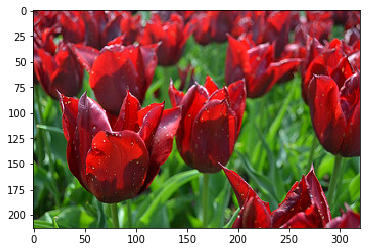

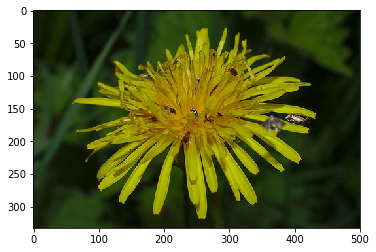

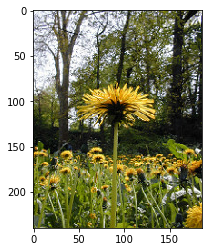

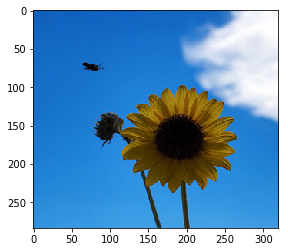

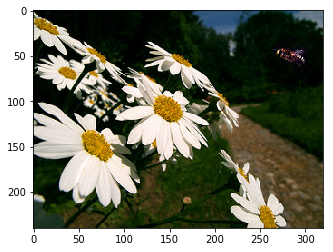

In [14]:
let images = trainList[0 ..< 5]
for i in 0 ..< 5 {
    plotImages(fromPath: String(images[i])!)
}

# Model Creation

## Define the model

In the cell below, create a convolutional neural network that consists of 3 convolution blocks. Each convolutional block contains a `Conv2D` layer followed by a max pool layer.  The first convolutional block should have 16 filters, the second one should have 32 filters, and the third one should have 64 filters. All convolutional filters should be 3 x 3. All max pool layers should have a `poolSize` of `(2, 2)` . 

After the 3 convolutional blocks you should have a flatten layer followed by a fully connected layer with 512 units. The CNN should output class probabilities based on 5 classes which is done by the **softmax** activation function. All other layers should use a **relu** activation function. You should also add Dropout layers with a probability of 20%,  where appropriate. 

In [0]:
// A classifier.
struct Classifier: Layer {
    typealias Input = Tensor<Float>
    typealias Output = Tensor<Float>

    var conv1a = Conv2D<Float>(filterShape: (3, 3, 3, 16), activation: relu)
    var pool1 = MaxPool2D<Float>(poolSize: (2, 2), strides: (2, 2))
    
    var conv1b = Conv2D<Float>(filterShape: (3, 3, 16, 32), activation: relu)
    var pool2 = MaxPool2D<Float>(poolSize: (2, 2), strides: (2, 2))
    
    var conv1c = Conv2D<Float>(filterShape: (3, 3, 32, 64), activation: relu)
    var pool3 = MaxPool2D<Float>(poolSize: (2, 2), strides: (2, 2))
    
    var flatten = Flatten<Float>()
    var dropout1a = Dropout<Float>(probability: 0.2)
    var layer1a = Dense<Float>(inputSize: 18496, outputSize: 512, activation: relu)
    var dropout1b = Dropout<Float>(probability: 0.2)
    var layer1b = Dense<Float>(inputSize: 512, outputSize: 5, activation: softmax)

    @differentiable
    public func callAsFunction(_ input: Input) -> Output {
        var convolved1 = pool1(conv1a(input))
        var convolved2 = pool2(conv1b(convolved1))
        var convolved3 = pool3(conv1c(convolved2))
        var dense1 = layer1a(dropout1a(flatten(convolved3)))
        var dense2 = layer1b(dropout1b(dense1))
        return dense2
    }
}

### Compile the model

As usual, we will use the `adam` optimizer. Since we are output a softmax categorization, we'll use `softmaxCrossEntropy` as the loss function. We would also like to look at training and validation accuracy on each epoch as we train our network, so we are passing in the metrics argument.

In [16]:
let tensor = Tensor<Float>(zeros:[1, 150, 150, 3])
var classifier = Classifier()
var optimizer = Adam(for: classifier, learningRate: 0.001)
classifier(tensor).shape

▿ [1, 5]
  ▿ dimensions : 2 elements
    - 0 : 1
    - 1 : 5


In [0]:
let epochCount = 80
let batchSize = 100

// Extract a batch of size batchSize.
func minibatch<Scalar>(in x: Tensor<Scalar>, at index: Int) -> Tensor<Scalar> {
    let start = index * batchSize
    return x[start..<start+batchSize]
}

In [0]:
var trainingAccuracy: [Float] = []
var validationAccuracy: [Float] = []
var trainingLoss: [Float] = []
var validationLoss: [Float] = []
var epochsRange: [Int] = []

### Train the model

It's time we train our network. 

In [19]:
print("Beginning training...")

struct Statistics {
    var correctGuessCount: Int = 0
    var totalGuessCount: Int = 0
    var totalLoss: Float = 0
}

// The training loop.
for epoch in 1...epochCount {
    epochsRange.append(epoch)
    var trainStats = Statistics()
    var testStats = Statistics()
    Context.local.learningPhase = .training
    for i in 0 ..< Int(trainList.count) / batchSize {
        let x = minibatch(in: trainImageTensors, at: i)
        let y = minibatch(in: trainLabelTensors, at: i)
        // Compute the gradient with respect to the model.
        let 𝛁model = classifier.gradient { classifier -> Tensor<Float> in
            let ŷ = classifier(x)
            let correctPredictions = ŷ.argmax(squeezingAxis: 1) .== y
            trainStats.correctGuessCount += Int(
              Tensor<Int32>(correctPredictions).sum().scalarized())
            trainStats.totalGuessCount += batchSize
            let loss = softmaxCrossEntropy(logits: ŷ, labels: y)
            trainStats.totalLoss += loss.scalarized()
            return loss
        }
        // Update the model's differentiable variables along the gradient vector.
        optimizer.update(&classifier.allDifferentiableVariables, along: 𝛁model)
    }

    Context.local.learningPhase = .inference
    for i in 0 ..< Int(testList.count) / batchSize {
        let x = minibatch(in: testImageTensors, at: i)
        let y = minibatch(in: testLabelTensors, at: i)
        // Compute loss on test set
        let ŷ = classifier(x)
        let correctPredictions = ŷ.argmax(squeezingAxis: 1) .== y
        testStats.correctGuessCount += Int(Tensor<Int32>(correctPredictions).sum().scalarized())
        testStats.totalGuessCount += batchSize
        let loss = softmaxCrossEntropy(logits: ŷ, labels: y)
        testStats.totalLoss += loss.scalarized()
    }
    
    let trainAccuracy = Float(trainStats.correctGuessCount) / Float(trainStats.totalGuessCount)
    let testAccuracy = Float(testStats.correctGuessCount) / Float(testStats.totalGuessCount)
    
    trainingAccuracy.append(trainAccuracy)
    validationAccuracy.append(testAccuracy)
    trainingLoss.append(trainStats.totalLoss)
    validationLoss.append(testStats.totalLoss)
    
    print("""
          [Epoch \(epoch)] \
          Training Loss: \(trainStats.totalLoss), \
          Training Accuracy: \(trainStats.correctGuessCount)/\(trainStats.totalGuessCount) \ 
          (\(trainAccuracy)), \
          Test Loss: \(testStats.totalLoss), \
          Test Accuracy: \(testStats.correctGuessCount)/\(testStats.totalGuessCount) \
          (\(testAccuracy))
          """)
}

Beginning training...
[Epoch 1] Training Loss: 44.255142, Training Accuracy: 1040/2900 (0.3586207), Test Loss: 9.751319, Test Accuracy: 354/700 (0.5057143)
[Epoch 2] Training Loss: 39.34551, Training Accuracy: 1566/2900 (0.54), Test Loss: 9.575021, Test Accuracy: 365/700 (0.5214286)
[Epoch 3] Training Loss: 37.911354, Training Accuracy: 1736/2900 (0.5986207), Test Loss: 9.494237, Test Accuracy: 382/700 (0.54571426)
[Epoch 4] Training Loss: 38.037872, Training Accuracy: 1717/2900 (0.592069), Test Loss: 9.35138, Test Accuracy: 397/700 (0.56714284)
[Epoch 5] Training Loss: 36.58033, Training Accuracy: 1855/2900 (0.6396552), Test Loss: 9.129825, Test Accuracy: 418/700 (0.5971429)
[Epoch 6] Training Loss: 35.315742, Training Accuracy: 1994/2900 (0.6875862), Test Loss: 9.17045, Test Accuracy: 404/700 (0.57714283)
[Epoch 7] Training Loss: 34.66893, Training Accuracy: 2070/2900 (0.7137931), Test Loss: 9.154608, Test Accuracy: 416/700 (0.5942857)
[Epoch 8] Training Loss: 34.099556, Training Acc

### Visualizing results of the training

We'll now visualize the results we get after training our network.

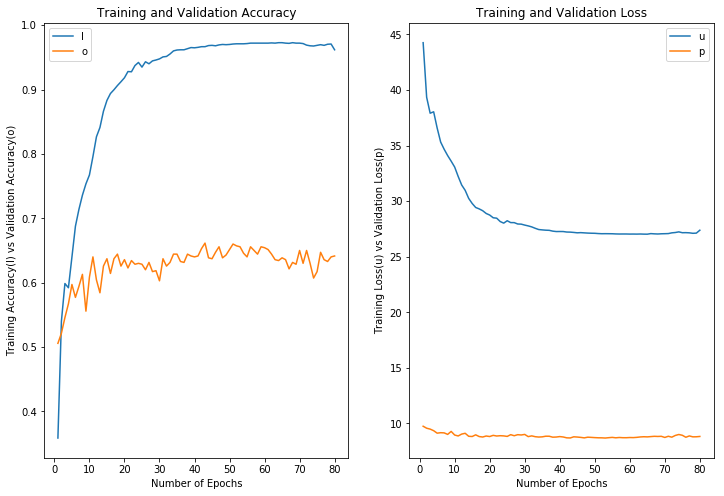

None


In [20]:
plt.figure(figsize: [12, 8])
plt.subplot(1, 2, 1)
plt.xlabel("Number of Epochs")
plt.ylabel("Training Accuracy(l) vs Validation Accuracy(o)")
plt.plot(epochsRange, trainingAccuracy)
plt.plot(epochsRange, validationAccuracy)
var loc = "lower right"
plt.legend(loc)
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss(u) vs Validation Loss(p)")
plt.plot(epochsRange, trainingLoss)
plt.plot(epochsRange, validationLoss)
loc = "upper right"
plt.legend(loc)
plt.title("Training and Validation Loss")
plt.show()